# 9. 이미지 처리

- **텐서플로를 활용할 수 있다.**
- **이미지를 분류할 수 있다.**
- **CNN(합성곱 신경망)을 활용할 수 있다.**


## **9-2. 딥러닝**

- 뇌의 뉴런과 유사한 머신러닝 알고리즘
- 심층 신경망 (DNN, Deep Neural Network)
- 입력층 - 은닉층 - 출력층이 있음

**[딥러닝의 학습 과정]**

- 순전파 : 예측값 계산
- 손실함수 : 오차 측정
- 옵티마이저(최적화) : 경사 하강법
- 역전파 : 가중치 조절

### 언더피팅과 오버피팅

- train loss (영상의 파란색 곡선) : 학습이 진행될 수록 감소 → train dataset에 맞게 모델이 학습되고 있음
- validation loss (영상의 주황색 곡선) : 특정 시점 이후로 증가 → 오버피팅

### 에폭(Epoch)

- 데이터셋을 모두 학습한 상태 (루프 N회)

### 텐서플로(Tensorflow)

- 2015년 구글 브레인팀에 의해 공개된 머신러닝을 위한 무료 오픈 소스 라이브러리
- 고수준 API 지원 (keras)
- 자동 미분

### Sequential 모델

- 레고블럭처럼 원하는 레이어만 불러들여서 쌓게 되면 하나의 딥러닝 모델을 만들 수 있음

## 9-3. 이미지 분류

### Flatten Layer

keras에서 젱공하는 함수인 Flatten을 통해 다차원 배열 공간을 1차원으로 평탄화해준다.
ex) (영상 설명 참고) 28 x 28 크기의 데이터를 1차원으로 평탄화 → 길이가 784인 벡터

### Dense Layer

입력과 출력을 모두 연결해준다. 입력 뉴런이 2개, 출력 뉴런이 4개라고 할 때 총 연결선은 2 x 4개가 된다. 각 연결선은 가중치(연결 강도)를 포함한다.

### activation function (활성화 함수)

- softmax : 확률 값 출력, 가장 높은 확률 값을 가지는 클래스 선택
- ReLU : x가 0보다 작으면 0을 출력하고, x가 0보다 크면 x값을 출력한다.

### optimizer (최적화 알고리즘)

- 손실함수 (Loss Function)를 최소화하면서 학습하는 방법
- optimizer 자세히 알아보기: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
- loss function 자세히 알아보기: https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [18]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
# version
tf.__version__

'2.6.0'

In [3]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# 데이터 확인
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

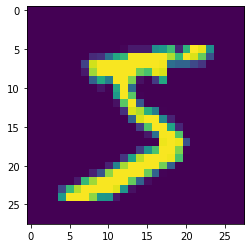

In [21]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [8]:
# label 확인
y_train[0]

5

In [9]:
# 모델 Flatten layer는 2차원을 한줄로 flat 하게만든다. 
from tensorflow.keras.layers import Flatten, Dense  # Dense는 완전 연결 layer
from tensorflow.keras.models import Sequential  #착착 쌓아 나갈 수 있게 하는 모델?

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(256, activation='relu'), # 뉴런의 갯수가 256 relu는 음수는 - , 양수는 n 인그래프
                    Dense(10, activation='softmax') # 10인 이유는 0~9개 총 10개이기 때문. softmax 는 각 값별 정답값 확률을 리스트로 나타냄.
])

In [10]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 컴파일 optimizer는 최적화 , 
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy', #분류기 때문에 'sparse_categorical_crossentropy' 쓴이유가 뭐인건데?
             metrics=['accuracy']) #정확도로 평가한다.

In [12]:
#학습 1875개만 학습하는 이유. 데이터 갯수가 60000개 인데 기본 batch 사이즈는 32로 설정되어 있기 때문에 60000/32 = 1875 로 나옴
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4368 - accuracy: 0.8881
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3473 - accuracy: 0.9249
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2829 - accuracy: 0.9355
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2438 - accuracy: 0.9436
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2316 - accuracy: 0.9471


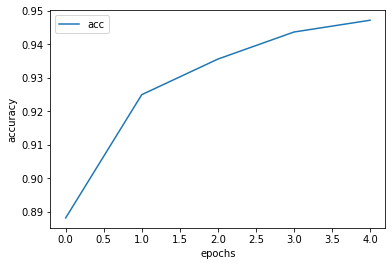

In [22]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

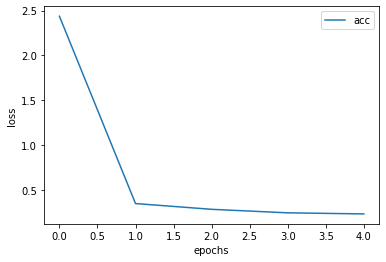

In [23]:
# 학습 정확도 (epoch에 따른 loss 변화)
plt.plot(history.history['loss'], label='acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## fashion_mnist 데이터

In [63]:
# 라이브러리 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [74]:
# 정규화(0 ~ 1 사이) 정규화를 안하니까 정확도가 감소하네??? 
X_train, X_test = X_train / 255.0, X_test / 255.0

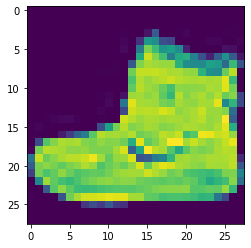

In [75]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [76]:
y_train[0]

9

In [77]:
# label 확인
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print(classes[y_train[0]])

Ankle boot


T-shirt/top


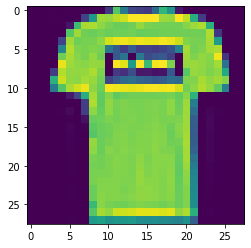

In [78]:
# 데이터 확인(이미지, 레이블)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [79]:
# 모델
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential 

model = Sequential([
                Flatten(input_shape=(28,28)),
                Dense(128, activation='relu'),
                Dropout(0.2), #dropout 은 dense와 달리 layer끼리 연결할때
    # 랜덤하게 일정비율만 연결한다.(오버피팅 방지를 위해)
                Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [80]:
# 학습 val_loss와 val_accuracy을 통해 오버피팅 확인 가능.
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
# validation_split으로 알아서 나눠서 테스트 학습 진행 가능
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)
#위와 달리 X테스트, y테스트로 validation data 지정해서 학습 가능

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5352 - accuracy: 0.8109 - val_loss: 0.4324 - val_accuracy: 0.8442
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4025 - accuracy: 0.8540 - val_loss: 0.3896 - val_accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3681 - accuracy: 0.8658 - val_loss: 0.3848 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3458 - accuracy: 0.8733 - val_loss: 0.3571 - val_accuracy: 0.8719
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3313 - accuracy: 0.8771 - val_loss: 0.3626 - val_accuracy: 0.8671
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3178 - accuracy: 0.8818 - val_loss: 0.3470 - val_accuracy: 0.8762
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3101 - accuracy: 0.8849 - val_loss: 0.3684 - val_accuracy:

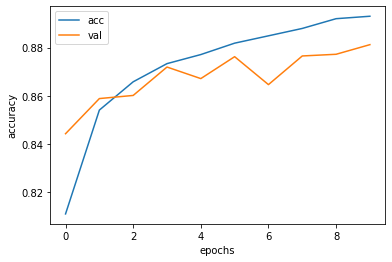

In [82]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

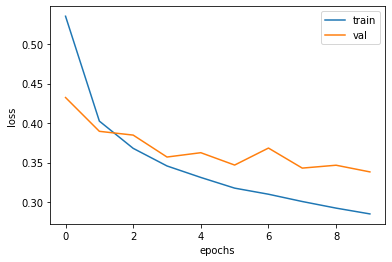

In [83]:
# loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [84]:
# 예측
pred = model.predict(X_test)
pred[1]

array([3.0619634e-05, 2.2004473e-16, 9.9832600e-01, 4.2021017e-14, 1.3344235e-03, 2.7920075e-12, 3.0893576e-04,
       3.0221748e-20, 4.5986548e-11, 2.8202771e-20], dtype=float32)

In [85]:
# 가장 높은 값 찾기 (np.argmax()는 데이터 중 가장 높은 인덱스 값)
np.argmax(pred[1])

2

In [86]:
# 예측한 label
classes[np.argmax(pred[1])]

'Pullover'

In [87]:
# 실제 label
classes[y_test[1]]

'Pullover'

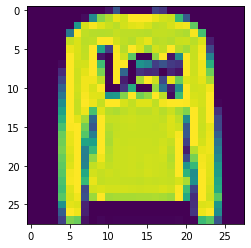

In [88]:
# 이미지 확인
plt.imshow(X_test[1])

## 9-4. CNN을 활용한 이미지 분류

### CNN (합성곱 신경망) :Convolutional Neural Network

- 시각적 영상을 분석하는데 사용되는 다층의 피드-포워드적인 인공신경망의 한 종류
- 합성곱층(Convolution Layer)과 풀링층(Pooling layer)으로 구성

In [89]:
# 라이브러리 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# 데이터 불러오기 
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 정규화(0~1 사이)
X_train, X_test = X_train / 255.0, X_test / 255.0

# 모델
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [91]:
# 학습
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.4609 - accuracy: 0.8333 - val_loss: 0.3505 - val_accuracy: 0.8733
Epoch 2/3
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3095 - accuracy: 0.8873 - val_loss: 0.3079 - val_accuracy: 0.8912
Epoch 3/3
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2621 - accuracy: 0.9049 - val_loss: 0.2801 - val_accuracy: 0.9004


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f4fa0375700>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


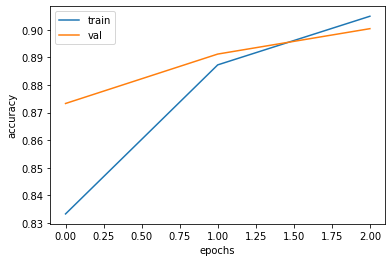

In [92]:
# 학습 정확도 (epoch에 따른 accuracy 변화)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

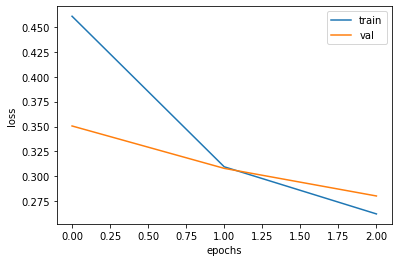

In [93]:
#loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()